In [13]:
import matplotlib.pyplot as plt

plt.style.use("ggplot")

In [22]:
from gnn_scheduler.jssp import (
    load_all_from_benchmark,
    load_pickle_instances_from_folders,
    JobShopInstance
)
from gnn_scheduler.gan import get_stat_dataframe, set_instance_attributes
from gnn_scheduler import get_data_path

In [81]:
DATA_PATH = get_data_path()
RANDOM_DATASET_FOLDER = (
    DATA_PATH / "difficulty_prediction" / "diff_prediction_instances"
)
AUGMENTED_DATASET_FOLDER = (
    DATA_PATH / "difficulty_prediction" / "augmented_benchmark_10machines"
)

In [5]:
def plot_difficulty_distribution(instances: list[JobShopInstance]):
    pass

### Benchmark Dataset

In [23]:
benchmark_dataset = load_all_from_benchmark()
benchmark_dataset = [
    set_instance_attributes(instance) for instance in benchmark_dataset
]
benchmark_stats = get_stat_dataframe(benchmark_dataset)
benchmark_stats

,name,n_jobs,n_machines,max_machine_load_and_job_duration,upper_bound,is_optimal,no_solution,difficulty_score
0,abz5,10,10,868,1272,True,False,0.465438
1,abz6,10,10,742,943,True,False,0.270889
2,abz7,20,15,556,765,True,False,0.375899
3,abz8,20,15,566,797,False,False,0.408127
4,abz9,20,15,563,855,True,False,0.518650
...,...,...,...,...,...,...,...,...
157,ta76,100,20,5342,10684,True,True,1.000000
158,ta77,100,20,5436,10872,True,True,1.000000
159,ta78,100,20,5394,10788,True,True,1.000000
160,ta79,100,20,5358,10716,True,True,1.000000


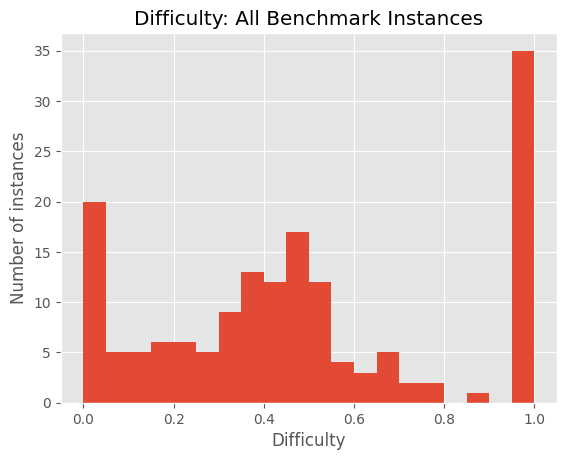

In [68]:
benchmark_stats.difficulty_score.plot(
    kind="hist",
    bins=20,
    title="Difficulty: All Benchmark Instances",
    xlabel="Difficulty",
    ylabel="Number of instances",
);

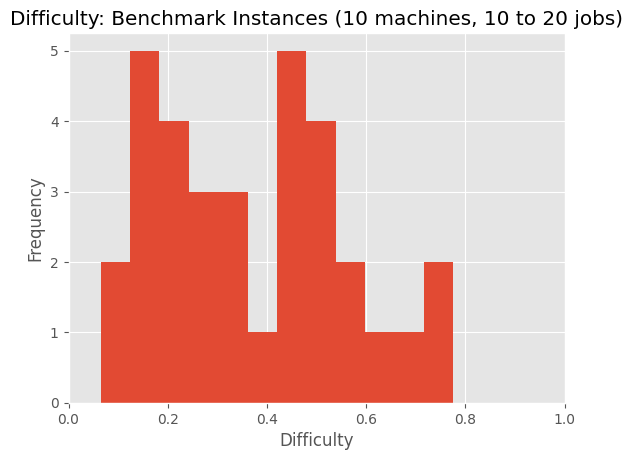

In [71]:
mask = (
    (benchmark_stats.n_jobs >= 10)
    & (benchmark_stats.n_jobs <= 20)
    & (benchmark_stats.n_machines == 10)
)
benchmark_stats[mask].difficulty_score.plot(
    kind="hist",
    bins=12,
    title="Difficulty: Benchmark Instances (10 machines, 10 to 20 jobs)",
    xlim=(0, 1),
    
)
plt.xlabel("Difficulty")
plt.show()

In [96]:
benchmark_stats[mask].difficulty_score.describe()

count    33.000000
mean      0.372014
std       0.194102
min       0.064922
25%       0.191566
50%       0.347243
75%       0.513582
max       0.775540
Name: difficulty_score, dtype: float64

In [97]:
benchmark_stats.difficulty_score.describe()

count    162.000000
mean       0.484848
std        0.330540
min        0.000000
25%        0.228772
50%        0.448396
75%        0.667983
max        1.000000
Name: difficulty_score, dtype: float64

### Purely Random Dataset

In [74]:
pr_instances = load_pickle_instances_from_folders(
    [RANDOM_DATASET_FOLDER]
)
pr_stats = get_stat_dataframe(pr_instances)
pr_stats

Loading instances: 100%|██████████| 49519/49519 [00:18<00:00, 2614.55it/s]


,name,n_jobs,n_machines,max_machine_load_and_job_duration,upper_bound,is_optimal,no_solution,difficulty_score
0,naive_generated_instance_35302,20,10,1092,1388,False,False,0.271062
1,naive_generated_instance_49119,10,10,668,791,False,False,0.184132
2,naive_generated_instance_39795,16,10,1005,1232,False,False,0.225871
3,naive_generated_instance_26963,13,10,825,965,False,False,0.169697
4,naive_generated_instance_33786,19,10,1057,1296,False,False,0.226112
...,...,...,...,...,...,...,...,...
49514,naive_generated_instance_46035,20,10,1089,1278,False,False,0.173554
49515,naive_generated_instance_48244,18,10,1091,1254,False,False,0.149404
49516,naive_generated_instance_2770,17,10,1061,1276,False,False,0.202639
49517,naive_generated_instance_3754,10,10,612,811,False,False,0.325163


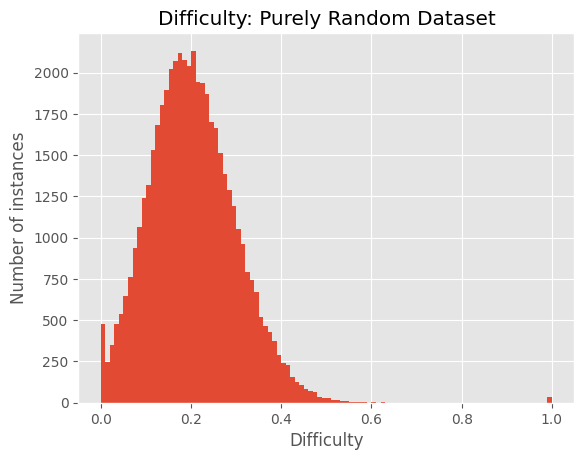

In [89]:
pr_stats.difficulty_score.plot(
    kind="hist",
    bins=100,
    title="Difficulty: Purely Random Dataset",
    xlabel="Difficulty",
    ylabel="Number of instances",
)
plt.show()

In [79]:
pr_stats.difficulty_score.describe()

count    49519.000000
mean         0.203298
std          0.096180
min          0.000000
25%          0.136126
50%          0.197546
75%          0.263523
max          1.000000
Name: difficulty_score, dtype: float64

### Augmented Dataset

In [82]:
aug_instances = load_pickle_instances_from_folders([AUGMENTED_DATASET_FOLDER])
aug_stats = get_stat_dataframe(aug_instances)

Loading instances:   0%|          | 0/21300 [00:00<?, ?it/s]

Loading instances: 100%|██████████| 21300/21300 [00:03<00:00, 5606.93it/s]


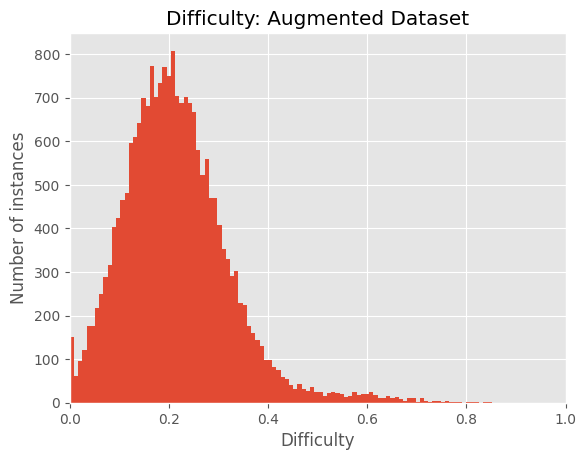

In [94]:
aug_stats.difficulty_score.plot(
    kind="hist",
    bins=100,
    title="Difficulty: Augmented Dataset",
    xlabel="Difficulty",
    ylabel="Number of instances",
)
plt.xlim(0, 1)
plt.show()

In [95]:
aug_stats.difficulty_score.describe()

count    21300.000000
mean         0.214818
std          0.107189
min          0.000000
25%          0.142609
50%          0.205021
75%          0.272653
max          0.850610
Name: difficulty_score, dtype: float64